<a href="https://colab.research.google.com/github/ramonfercruz/cotacao_saca_cafe_aribica/blob/main/rede_neural_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
import numpy as np
drive.mount('/content/drive')
DIRETORIO = '/content/drive/MyDrive/TCC/data/20230723'

Mounted at /content/drive


In [ ]:
print(sns.color_palette().as_hex())
sns.color_palette()

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
 # Definir colunas de interesse

target_col = ['cafe_aribica']
feature_cols = ['cafe_aribica',
                'dolar',
                'diesel',
                '12_MESES',
                'cafe_aribica_dif'
                #'IPCA_MES',
                #'3_MESES',
                #'IPCA_6_MESES',
               #'IPCA_ANO',
                #'12_MESES',
                #'cafe_aribica_mov_quadrimestre',
                #'cafe_aribica_mov_semestre',
                #'cafe_aribica_mov_anual',
              'inverno', 'outono', 'primavera', 'verao',
              'April', 'August', 'December', 'February', 'January',
               'July', 'June', 'March', 'May', 'November', 'October',
                'September'
       ]
feature_cols = target_col
target_col = target_col

In [ ]:
data_frame = pd.read_excel(os.path.join(DIRETORIO,'cotacao_cafe_inrriquecida.xlsx')).query('ano >= 2010')
data_frame['diesel'].fillna(method='ffill', inplace=True)

data_frame.set_index('Data', inplace=True)
data_frame.sort_index(  inplace=True)

data = data_frame[feature_cols]
#data['target'] = data.cafe_aribica.shift(-1)
#data.dropna(inplace=True)

In [ ]:
data_frame.cafe_aribica_dif

Data
2010-01-01     -0.82
2010-02-01     -2.07
2010-03-01      1.02
2010-04-01      2.48
2010-05-01      7.28
               ...  
2023-02-01    120.26
2023-03-01    -24.85
2023-04-01      1.68
2023-05-01    -66.48
2023-06-01   -111.02
Name: cafe_aribica_dif, Length: 162, dtype: float64

In [ ]:
from sklearn import metrics

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 101ms/step
mape_test: 0.05, mse_test: 1365.57, r2_test: 0.36, mse_log_test: 0.01, mae_test: 24.00, rmse_test: 36.95, 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 20ms/step
mape_test: 0.08, mse_test: 2387.80, r2_test: -1.09, mse_log_test: 0.01, mae_test: 44.52, rmse_test: 48.87, 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 19ms/step
mape_test: 0.13, mse_test: 17215.29, r2_test: 0.47, mse_log_test: 0.02, mae_test: 120.64, rmse_test: 131.21, 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 19ms/step
mape_test: 0.10, mse_test: 26663.71, r2_test: -2.71, mse_log_test: 0.01, mae_test: 136.88, rmse_test: 163.29, 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 19ms/step
mape_test: 0.02, mse_test: 489.26, r2_test: 0.95, mse_log_test: 0.00, mae_test: 18.82, rmse_test: 22.12, 
0.07696895874512506


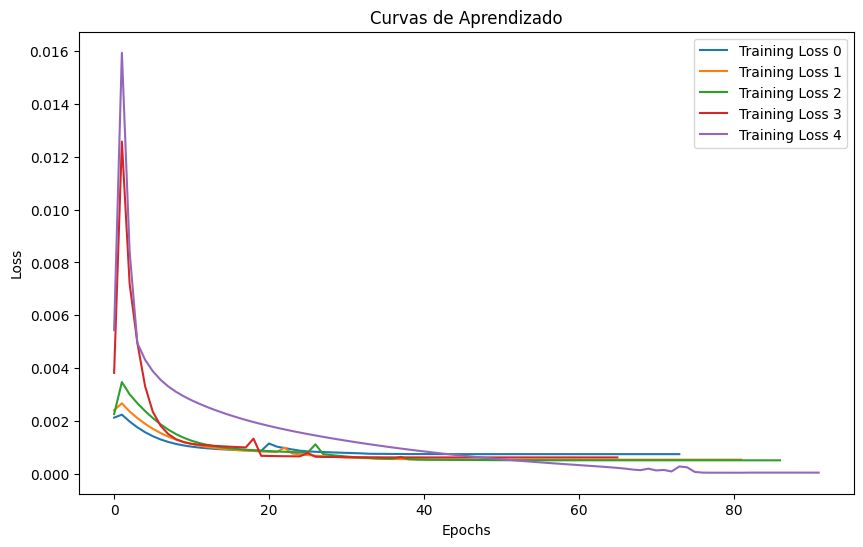

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 482601 (1.84 MB)
Trainable params: 482601 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import gc
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,  Dropout
from sklearn import metrics



from keras.callbacks import EarlyStopping #Para o treinamento se não ouver mais melhorias no modelo
from keras.callbacks import ReduceLROnPlateau #reduzir a taxa de aprendizagem se um metrica parou de melhorar
from keras.callbacks import ModelCheckpoint #Salva o modelo depois de cada epoca

import matplotlib.pyplot as plt

np.seed = 1

def create_lstm_model(input_shape, layers=(50,),activation='tanh'):
    model = Sequential()

    for i, units in enumerate(layers):
        if i != len(layers) - 1:
            model.add(LSTM(units, input_shape=input_shape, activation= activation, return_sequences=True))
            #model.add(Dropout(0.01))
        else:
            model.add(LSTM(units, input_shape=input_shape, activation=activation))
    model.add(Dense(1))

    model.compile(optimizer = 'rmsprop', loss =  'mean_squared_error' ,metrics = ['mean_absolute_error'])
    return model


def prepare_lstm_data(data, target_col, feature_cols, seq_length=6):
    X = data[feature_cols].values
    y = data[target_col].values

    scaler_X = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)

    scaler_y = MinMaxScaler()
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    X_sequences = create_sequences(X_scaled, seq_length)
    y_sequences = create_sequences(y_scaled, seq_length, is_target=True)

    return X_sequences, y_sequences, scaler_X, scaler_y

def create_sequences(data, seq_length, is_target=False):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequence = data[i:i+seq_length]
        if is_target:
            sequences.append(sequence[-1])  # Append the last value of the sequence for y
        else:
            sequences.append(sequence)
    return np.array(sequences)


import seaborn as sns
from matplotlib import pyplot as plt

def reshape_y(y, scaler_y):
  y = scaler_y.inverse_transform(y)
  return y.reshape(1, -1)[0]


def compara_treino_teste(y, y_train_predict, y_pred, scaler_y):
    train_size = len(y_train_predict)
    y_size = len(y)
    test_size = len(test_y)

    plt.figure(figsize=(10, 3))
    ax = sns.lineplot(y=reshape_y(y, scaler_y), x=range(y_size), color='#ff7f0e',label='Valor real')
    ax1 = sns.lineplot(y=reshape_y(y_train_predict, scaler_y), x=range(train_size), linestyle='--', color='#17becf', label='Predição treino')
    ax2 = sns.lineplot(y=reshape_y(y_pred, scaler_y), x=range(train_size, train_size + test_size), linestyle=':', color='#1f77b4',label='Predição Teste')
    ax.set_ylabel('Cotação Café')
    ax.set_xlabel('Período')

# Preparar os dados
X, y, scaler_X, scaler_y = prepare_lstm_data(data, target_col, feature_cols, seq_length=4)

# Definir o número de folds para a validação cruzada
n_splits = 5
test_size = 10
tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size )

resultados=[]

# Plot das curvas de aprendizado
plt.figure(figsize=(10, 6))

lista_avaliacao = [ ]

# Loop de validação cruzada
for i , (train_index, test_index) in enumerate(tscv.split(X)):
    train_X, test_X = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]

    tf.keras.backend.clear_session()
    gc.collect()


    model = create_lstm_model(input_shape=(train_X.shape[1], train_X.shape[2]), layers=(200,200))

    es = EarlyStopping(monitor='loss', min_delta=0.000000001, patience=10, verbose=0)
    rlr = ReduceLROnPlateau(monitor='loss',
                            factor=0.2, # taxa de redução
                            patience=5,
                            verbose=0)
    mcp = ModelCheckpoint(filepath='pesos.h5', monitor='loss', save_best_only=True, verbose=0)

    history = model.fit(train_X,
                        train_y,
                        epochs=1000,
                        shuffle=False,
                        batch_size=4,
                        verbose=0,
                        validation_data=(test_X, test_y),
                        callbacks=[ rlr,  es, mcp])

    plt.plot(history.history['loss'], label=f'Training Loss {i}')
    #plt.plot(history.history['val_loss'], label=f'Validation Loss {i}')

    model.load_weights('pesos.h5')

    # Avaliar o modelo
    y_train_predict = model.predict(train_X)
    y_pred = model.predict(test_X)
    y_pred_original = scaler_y.inverse_transform(y_pred)
    test_y_original = scaler_y.inverse_transform(test_y.reshape(-1, 1))

    mape = mean_absolute_percentage_error(test_y_original, y_pred_original)
    mse = mean_squared_error(test_y_original, y_pred_original)
    rmse = mean_squared_error(test_y_original, y_pred_original, squared=False)
    r2 = r2_score(test_y_original, y_pred_original)
    mse_log = mean_squared_error(np.log(test_y_original + 1), np.log(y_pred_original + 1))
    mae = metrics.mean_absolute_error(test_y_original, y_pred_original)


    metricas_teste = {'mape_test': mape,
     'mse_test': mse,
     'r2_test': r2,
     'mse_log_test': mse_log,
     'mae_test': mae,
     'rmse_test': rmse}

    lista_avaliacao.append(metricas_teste)
    text_metrica = ''
    for chave, valor in metricas_teste.items():
      text_metrica = text_metrica + f'{chave}: {valor:.2f}, '
    print(text_metrica)


   #print(history.history['val_loss'])

    #del model
    del history


    resultados.append(mape)
print(np.mean(resultados))

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.show()
model.summary()


In [ ]:
df_lstm = pd.DataFrame(lista_avaliacao)
df_lstm

,mape_test,mse_test,r2_test,mse_log_test,mae_test,rmse_test
0,0.049405,1365.574559,0.357787,0.005912,24.004578,36.953681
1,0.079643,2387.803626,-1.085883,0.008128,44.523865,48.865158
2,0.132692,17215.293728,0.470128,0.021523,120.638280,131.207064
3,0.104595,26663.710169,-2.713509,0.013575,136.882465,163.290264
4,0.018510,489.256935,0.951890,0.000477,18.822927,22.119153


In [ ]:
df_lstm.mape_test.mean()

0.07696895874512506

In [ ]:
lista_avaliacao

[{'mape_test': 0.0494051469310432,
  'mse_test': 1365.5745588320651,
  'r2_test': 0.3577873259046841,
  'mse_log_test': 0.005912035400179595,
  'mae_test': 24.00457800292968,
  'rmse_test': 36.95368126225133},
 {'mape_test': 0.07964275891691004,
  'mse_test': 2387.8036257473454,
  'r2_test': -1.0858834863954918,
  'mse_log_test': 0.008127978330115568,
  'mae_test': 44.52386535644531,
  'rmse_test': 48.8651575843908},
 {'mape_test': 0.13269232697252292,
  'mse_test': 17215.29372776213,
  'r2_test': 0.4701280936385599,
  'mse_log_test': 0.021523434816455418,
  'mae_test': 120.63827978515629,
  'rmse_test': 131.20706432110327},
 {'mape_test': 0.1045949499799633,
  'mse_test': 26663.710169148835,
  'r2_test': -2.7135092648735877,
  'mse_log_test': 0.013575040550441116,
  'mae_test': 136.88246533203127,
  'rmse_test': 163.29026354669415},
 {'mape_test': 0.01850961092518587,
  'mse_test': 489.25693469660246,
  'r2_test': 0.9518902015689391,
  'mse_log_test': 0.0004771761728039741,
  'mae_tes

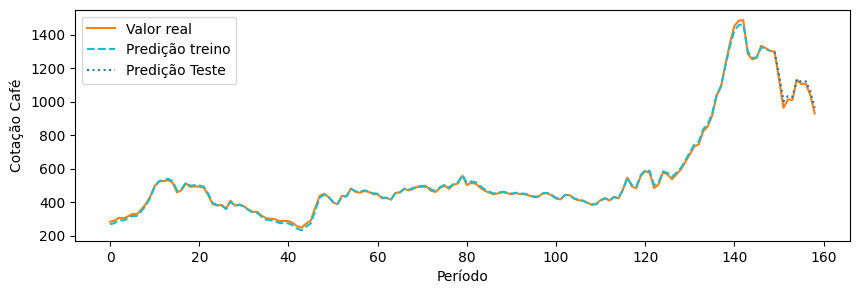

In [ ]:
compara_treino_teste(y, y_train_predict, y_pred, scaler_y)

In [ ]:
y_pred , test_y

(array([[0.84836024],
        [0.7374434 ],
        [0.60945725],
        [0.6338446 ],
        [0.6297992 ],
        [0.7148991 ],
        [0.7025493 ],
        [0.7052671 ],
        [0.6585828 ],
        [0.576909  ]], dtype=float32),
 array([[0.84856418],
        [0.71731226],
        [0.57730159],
        [0.61782292],
        [0.61532619],
        [0.71249657],
        [0.6924177 ],
        [0.69377515],
        [0.64005915],
        [0.55035471]]))

In [ ]:

def plot_time_series(train_actual, train_predicted, test_actual, test_predicted, title='Série Temporal'):
    plt.figure(figsize=(10, 6))

    train_size = len(train_actual)
    test_size = len(test_actual)

    plt.plot(range(train_size), train_actual, label='Treinamento (real)', color='orange')
    plt.plot(range(train_size), train_predicted, label='Treinamento (predito)', linestyle='dashed', color='b')
    plt.plot(range(train_size, train_size + test_size), test_actual, label='Teste (real)', color='green')
    plt.plot(range(train_size, train_size + test_size), test_predicted, label='Teste (predito)', linestyle='dashed', color='red')

    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.title(title)
    plt.legend()
    plt.show()

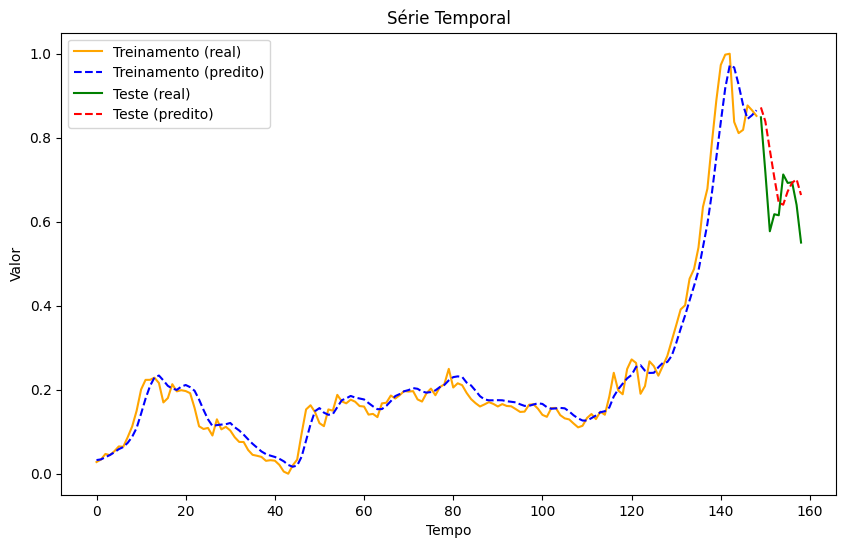

In [ ]:
plot_time_series(train_y, y_train_predict, test_y, y_pred, title='Série Temporal')